In [ ]:
!pip install pydot

import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import entropy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def opinion_distribution(opinions):
  op_dist = np.zeros((21, len(opinions)))

  for x in range(len(op_dist[0])):
    for y in range(len(opinions[0])):
      value = opinions[x][y] + 10
      op_dist[int(value)][x] += 1

  for x in range(len(op_dist)):
    for y in range(len(op_dist[0])):
      op_dist[x][y] = op_dist[x][y] / len(opinions[0])

  return op_dist

In [ ]:
def entropy_calc(opinion_freq):
  entropies = np.zeros(len(opinion_freq[0]))

  for x in range(len(entropies)):
    entropies[x] = entropy(opinion_freq[:,x], base=2)

  return entropies

In [ ]:
def opinion_changed(opinions):
  changed = np.zeros(len(opinions)-1)

  for x in range(len(opinions)-1):
    for y in range(len(opinions[0])):
      if opinions[x][y] != opinions[x+1][y]:
        changed[x] += 1

  return changed

# networks


In [ ]:
network_50node = np.asarray(pd.read_csv('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Data/50node_network.csv'))
network_100node = np.asarray(pd.read_csv('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Data/100node_network.csv'))
network_150node = np.asarray(pd.read_csv('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Data/150node_network.csv'))
network_200node = np.asarray(pd.read_csv('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Data/200node_network.csv'))

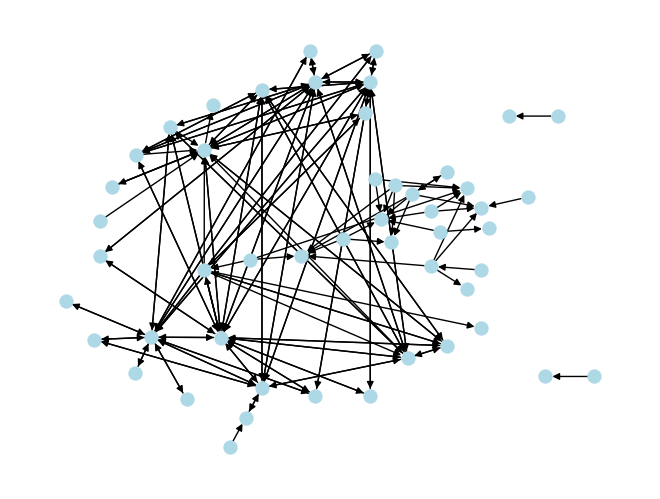

In [ ]:
network_50 = nx.DiGraph()

for i in network_50node:
  network_50.add_edge(str(i[0]), str(i[1]))

nx.draw(network_50, pos = nx.nx_pydot.graphviz_layout(network_50, prog="twopi"), node_size=100, node_color='lightblue', linewidths=0.25)

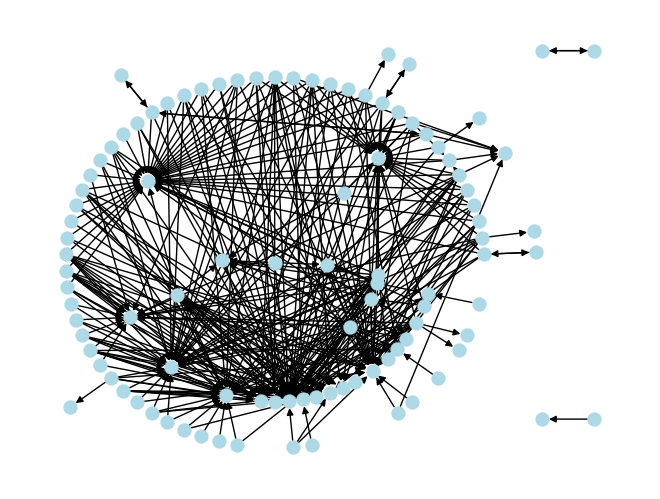

In [ ]:
network_100 = nx.DiGraph()

for i in network_100node:
  network_100.add_edge(str(i[0]), str(i[1]))

nx.draw(network_100, pos = nx.nx_pydot.graphviz_layout(network_100, prog="twopi"), node_size=100, node_color='lightblue', linewidths=0.25)

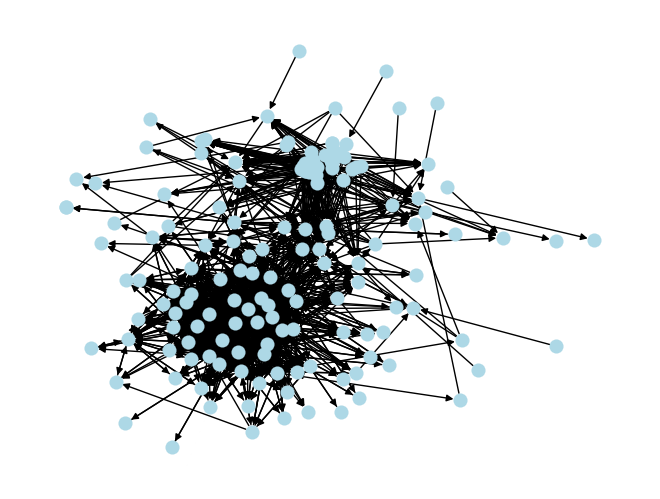

In [ ]:
network_150 = nx.DiGraph()

for i in network_150node:
  network_150.add_edge(str(i[0]), str(i[1]))

nx.draw(network_150, pos = nx.kamada_kawai_layout(network_150), node_size=100, node_color='lightblue', linewidths=0.1)

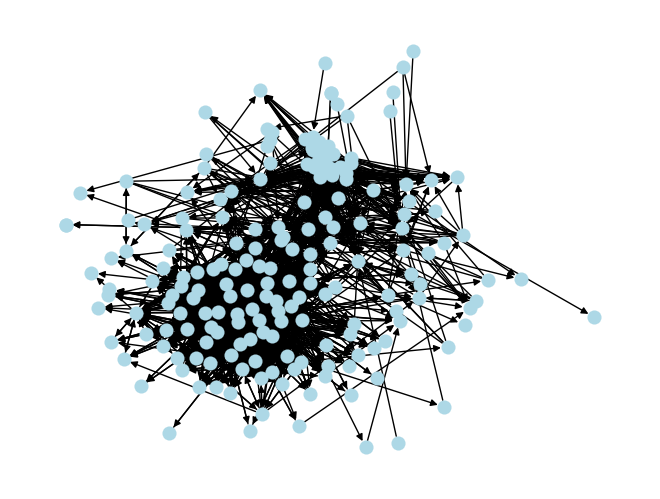

In [ ]:
network_200 = nx.DiGraph()

for i in network_200node:
  network_200.add_edge(str(i[0]), str(i[1]))

nx.draw(network_200, pos = nx.kamada_kawai_layout(network_200), node_size=100, node_color='lightblue', linewidths=0.1)

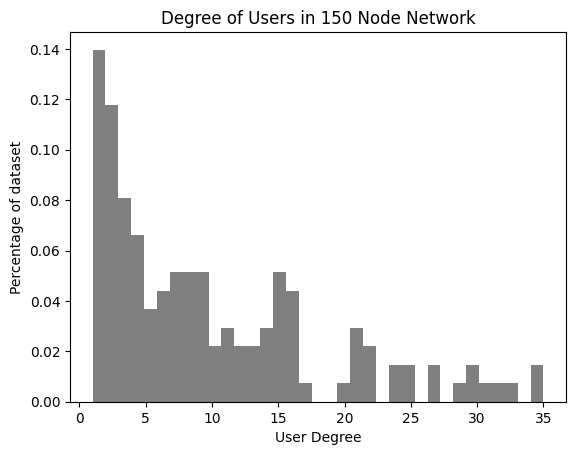

In [ ]:
nodelist, degree = np.unique(np.asarray(network_200node), return_counts=True)

plt.hist(degree, range=[1, 35], facecolor='gray', align='mid', density = True, bins = 35)

plt.title("Degree of Users in 150 Node Network")
plt.xlabel("User Degree")
plt.ylabel("Percentage of dataset")

plt.show()

# 50 user

In [ ]:
u50_run1 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u50_run1_results.npy')
u50_run2 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u50_run2_results.npy')
u50_run3 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u50_run3_results.npy')
u50_run4 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u50_run4_results.npy')
u50_run5 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u50_run5_results.npy')

In [ ]:
steps = np.linspace(1,25,25)
u50_avg1 = np.mean(u50_run1, axis=1)
u50_avg2 = np.mean(u50_run2, axis=1)
u50_avg3 = np.mean(u50_run3, axis=1)
u50_avg4 = np.mean(u50_run4, axis=1)
u50_avg5 = np.mean(u50_run5, axis=1)

u50_runs_df = pd.DataFrame({
    'Steps': steps,
    'Run 1': u50_avg1,
    'Run 2': u50_avg2,
    'Run 3': u50_avg3,
    'Run 4': u50_avg4,
    'Run 5': u50_avg5})
u50_runs_df = pd.melt(u50_runs_df, ['Steps'], var_name='Run #', value_name='Opinions')

Text(0.5, 1.0, 'Average Political Opinion Over 25 Steps for 50 Users')

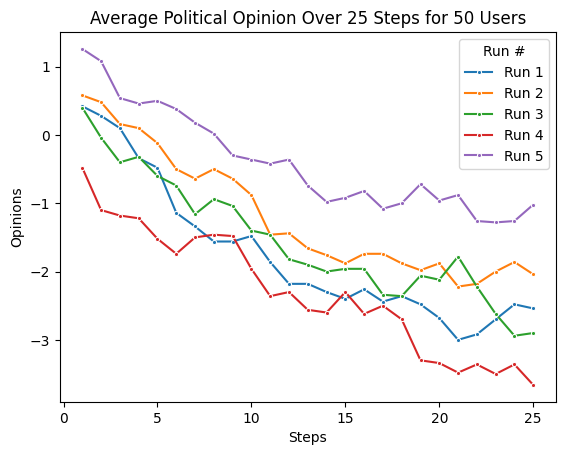

In [ ]:
ax = sns.lineplot(data=u50_runs_df, x='Steps', y='Opinions', hue='Run #', marker = '.')
ax.set_title('Average Political Opinion Over 25 Steps for 50 Users')

Text(0.5, 1.0, 'Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 50 Users')

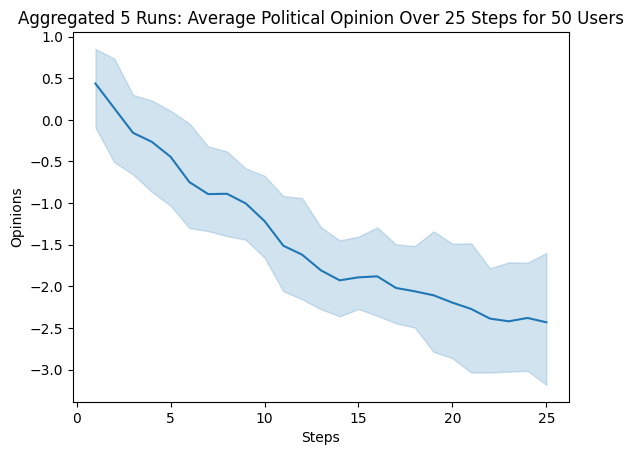

In [ ]:
ax = sns.lineplot(data=u50_runs_df, x='Steps', y="Opinions")
ax.set_title('Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 50 Users')

# 100 user

In [ ]:
run1 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/run1_results.npy')
run2 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/run2_results.npy')
run3 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/run3_results.npy')
run4 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/run4_results.npy')
run5 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/run5_results.npy')

In [ ]:
steps = np.linspace(1,25,25)
avg1 = np.mean(run1, axis=1)
avg2 = np.mean(run2, axis=1)
avg3 = np.mean(run3, axis=1)
avg4 = np.mean(run4, axis=1)
avg5 = np.mean(run5, axis=1)

u100_runs_df = pd.DataFrame({
    'Steps': steps,
    'Run 1': avg1,
    'Run 2': avg2,
    'Run 3': avg3,
    'Run 4': avg4,
    'Run 5': avg5})
u100_runs_df = pd.melt(u100_runs_df, ['Steps'], var_name='Run #', value_name='Opinions')

Text(0.5, 1.0, 'Average Political Opinion Over 25 Steps for 100 Users')

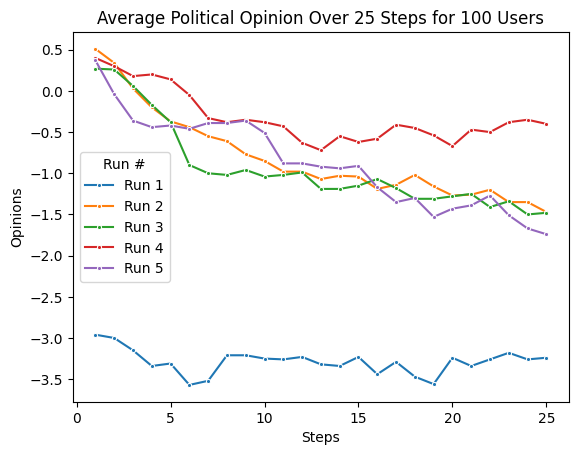

In [ ]:
ax = sns.lineplot(data=u100_runs_df, x='Steps', y='Opinions', hue='Run #', marker = '.')
ax.set_title('Average Political Opinion Over 25 Steps for 100 Users')

Text(0.5, 1.0, 'Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 100 Users')

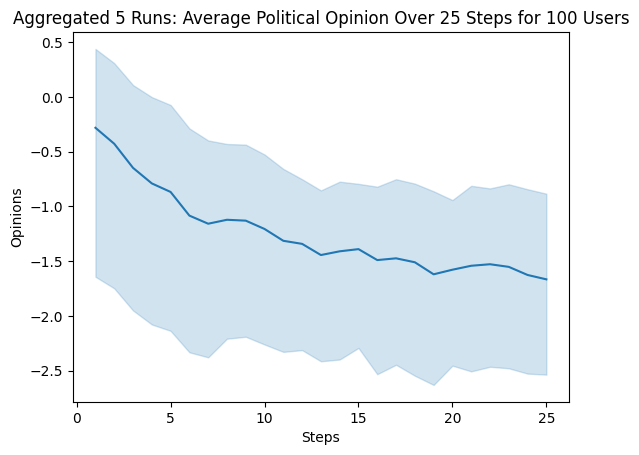

In [ ]:
ax = sns.lineplot(data=u100_runs_df, x='Steps', y="Opinions")
ax.set_title('Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 100 Users')

# 150 users

In [ ]:
u150_run1 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u150_run1_results.npy')
u150_run2 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u150_run2_results.npy')
u150_run3 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u150_run3_results.npy')
u150_run4 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u150_run4_results.npy')
u150_run5 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u150_run5_results.npy')

In [ ]:
steps = np.linspace(1,25,25)
u150_avg1 = np.mean(u150_run1, axis=1)
u150_avg2 = np.mean(u150_run2, axis=1)
u150_avg3 = np.mean(u150_run3, axis=1)
u150_avg4 = np.mean(u150_run4, axis=1)
u150_avg5 = np.mean(u150_run5, axis=1)

u150_runs_df = pd.DataFrame({
    'Steps': steps,
    'Run 1': u150_avg1,
    'Run 2': u150_avg2,
    'Run 3': u150_avg3,
    'Run 4': u150_avg4,
    'Run 5': u150_avg5})
u150_runs_df = pd.melt(u150_runs_df, ['Steps'], var_name='Run #', value_name='Opinions')

Text(0.5, 1.0, 'Average Political Opinion Over 25 Steps for 150 Users')

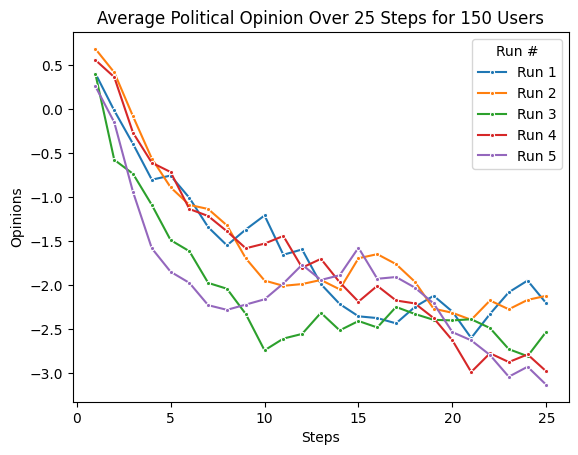

In [ ]:
ax = sns.lineplot(data=u150_runs_df, x='Steps', y='Opinions', hue='Run #', marker = '.')
ax.set_title('Average Political Opinion Over 25 Steps for 150 Users')

Text(0.5, 1.0, 'Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 150 Users')

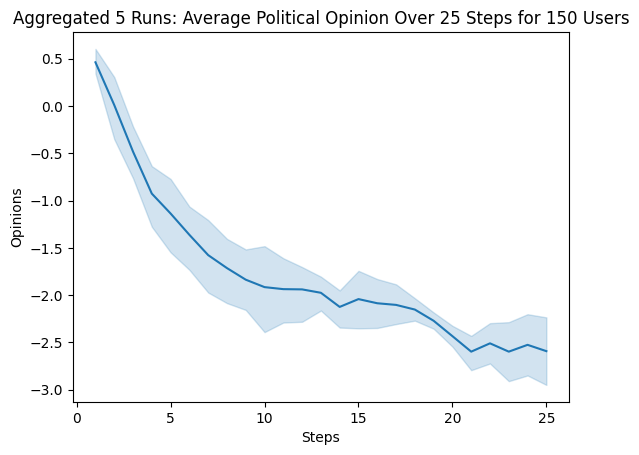

In [ ]:
ax = sns.lineplot(data=u150_runs_df, x='Steps', y="Opinions")
ax.set_title('Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 150 Users')

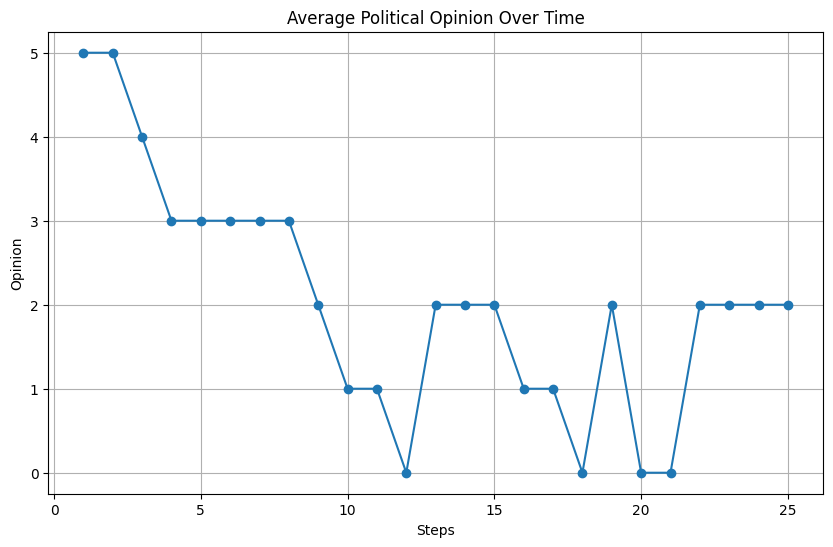

In [ ]:
steps = np.linspace(1, 25, 25)
avg_opinion = u150_run1[:, 16]

plt.figure(figsize=(10, 6))
plt.plot(steps, avg_opinion, marker='o', linestyle='-')
plt.title('Average Political Opinion Over Time')
plt.xlabel('Steps')
plt.ylabel('Opinion')

plt.grid(True)
plt.show()

# 200 users

In [ ]:
u200_run1 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u200_run1_results.npy')
u200_run2 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u200_run2_results.npy')
u200_run3 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u200_run3_results.npy')
u200_run4 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u200_run4_results.npy')
u200_run5 = np.load('/content/drive/MyDrive/Hate in ABM Society/Report and Data/Results/Raw Data/u200_run5_results.npy')

In [ ]:
steps = np.linspace(1,25,25)
u200_avg1 = np.mean(u200_run1, axis=1)
u200_avg2 = np.mean(u200_run2, axis=1)
u200_avg3 = np.mean(u200_run3, axis=1)
u200_avg4 = np.mean(u200_run4, axis=1)
u200_avg5 = np.mean(u200_run5, axis=1)

u200_runs_df = pd.DataFrame({
    'Steps': steps,
    'Run 1': u200_avg1,
    'Run 2': u200_avg2,
    'Run 3': u200_avg3,
    'Run 4': u200_avg4,
    'Run 5': u200_avg5})
u200_runs_df = pd.melt(u200_runs_df, ['Steps'], var_name='Run #', value_name='Opinions')

Text(0.5, 1.0, 'Average Political Opinion Over 25 Steps for 200 Users')

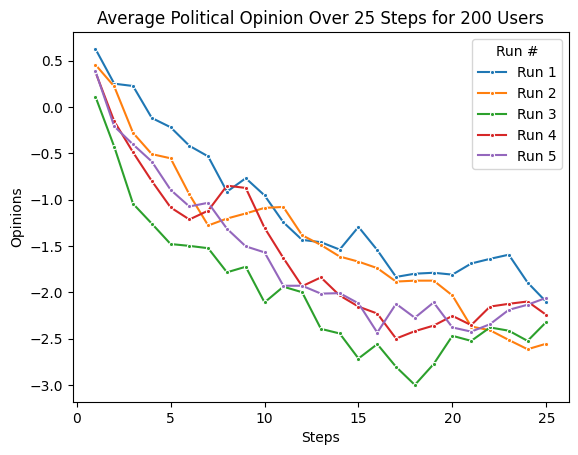

In [ ]:
ax = sns.lineplot(data=u200_runs_df, x='Steps', y='Opinions', hue='Run #', marker = '.')
ax.set_title('Average Political Opinion Over 25 Steps for 200 Users')

Text(0.5, 1.0, 'Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 200 Users')

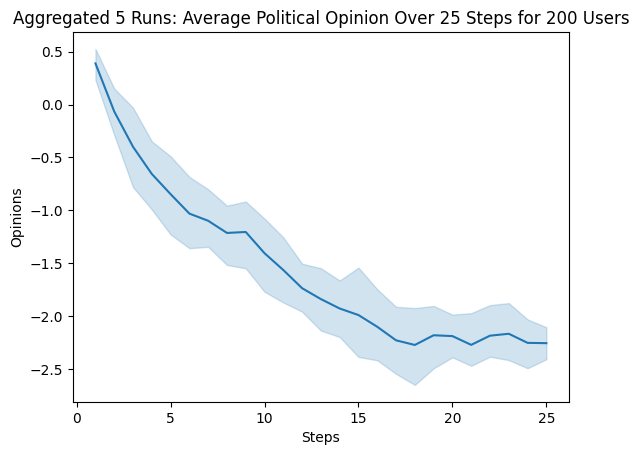

In [ ]:
ax = sns.lineplot(data=u200_runs_df, x='Steps', y="Opinions")
ax.set_title('Aggregated 5 Runs: Average Political Opinion Over 25 Steps for 200 Users')

In [ ]:
steps = np.linspace(1,25,25)
u200_run1_entropy = entropy_calc(opinion_distribution(u200_run1))
u200_run2_entropy = entropy_calc(opinion_distribution(u200_run2))
u200_run3_entropy = entropy_calc(opinion_distribution(u200_run3))
u200_run4_entropy = entropy_calc(opinion_distribution(u200_run4))
u200_run5_entropy = entropy_calc(opinion_distribution(u200_run5))

u200_runs_entropy = pd.DataFrame({
    'Steps': steps,
    'Run 1': u200_run1_entropy,
    'Run 2': u200_run2_entropy,
    'Run 3': u200_run3_entropy,
    'Run 4': u200_run4_entropy,
    'Run 5': u200_run5_entropy})
u200_runs_entropy = pd.melt(u200_runs_entropy, ['Steps'], var_name='Run #', value_name='Entropy')

Text(0.5, 1.0, 'Entropy in Opinion Over 25 Steps for 200 Users')

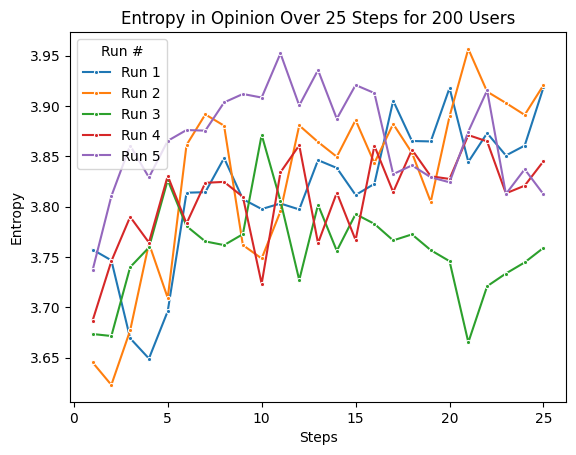

In [ ]:
ax = sns.lineplot(data=u200_runs_entropy, x='Steps', y='Entropy', hue='Run #', marker = '.')
ax.set_title('Entropy in Opinion Over 25 Steps for 200 Users')

Text(0.5, 1.0, 'Aggregated 5 Runs: Entropy in Opinion Over 25 Steps for 200 Users')

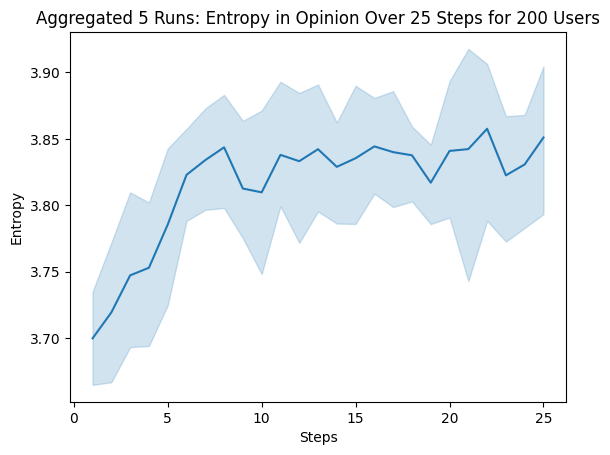

In [ ]:
ax = sns.lineplot(data=u200_runs_entropy, x='Steps', y="Entropy")
ax.set_title('Aggregated 5 Runs: Entropy in Opinion Over 25 Steps for 200 Users')

In [ ]:
steps = np.linspace(1,24,24)
u200_run1_changed = opinion_changed(u200_run1)
u200_run2_changed = opinion_changed(u200_run2)
u200_run3_changed = opinion_changed(u200_run3)
u200_run4_changed = opinion_changed(u200_run4)
u200_run5_changed = opinion_changed(u200_run5)

u200_runs_changed = pd.DataFrame({
    'Steps': steps,
    'Run 1': u200_run1_changed,
    'Run 2': u200_run2_changed,
    'Run 3': u200_run3_changed,
    'Run 4': u200_run4_changed,
    'Run 5': u200_run5_changed})
u200_runs_changed = pd.melt(u200_runs_changed, ['Steps'], var_name='Run #', value_name='Opinions Changed')

Text(0.5, 1.0, '# of User Opinion Changes Over 25 Steps for 200 Users')

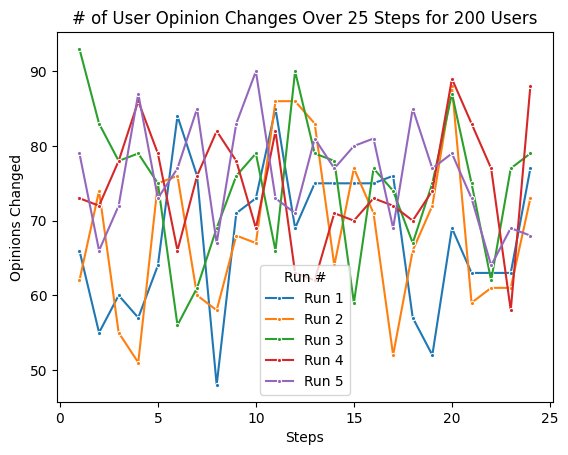

In [ ]:
ax = sns.lineplot(data=u200_runs_changed, x='Steps', y='Opinions Changed', hue='Run #', marker = '.')
ax.set_title('# of User Opinion Changes Over 25 Steps for 200 Users')

Text(0.5, 1.0, '# of User Opinion Changes Over 25 Steps for 200 Users')

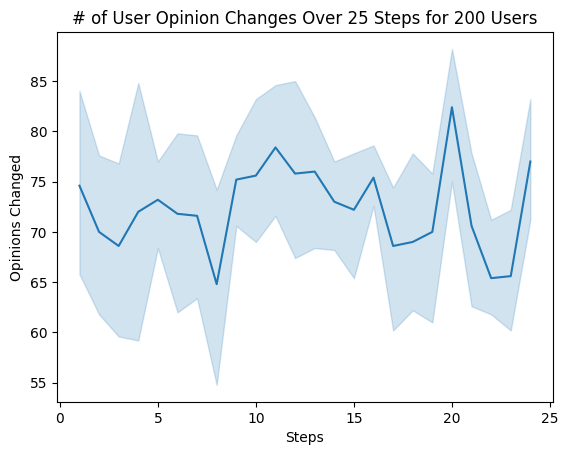

In [ ]:
ax = sns.lineplot(data=u200_runs_changed, x='Steps', y='Opinions Changed')
ax.set_title('# of User Opinion Changes Over 25 Steps for 200 Users')

# New Section

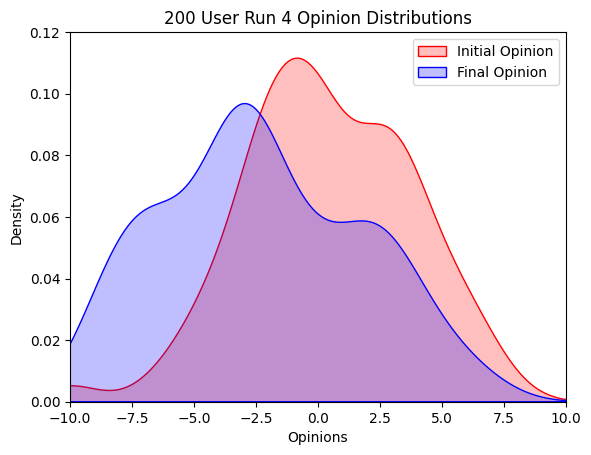

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(u200_run4[0], color="red", label="Initial Opinion", ax=ax, fill=True)
sns.kdeplot(u200_run4[24], color="blue", label="Final Opinion", ax=ax, fill=True)

ax.legend()
ax.set_xlabel('Opinions')
ax.set_title('200 User Run 4 Opinion Distributions')
ax.set_xbound(-10, 10)
ax.set_ybound(0, 0.12)